In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8026315789473685

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
example_dict = {"RandomForestClassifier": RandomForestClassifier()}
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}
results = {}

In [ ]:
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

example_results

{'RandomForestClassifier': 0.7631578947368421}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LinearSVC': 0.7631578947368421,
 'KNN': 0.6447368421052632,
 'SVC': 0.618421052631579,
 'LogisticRegression': 0.7894736842105263,
 'RandomForestClassifier': 0.7631578947368421}

In [ ]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LinearSVC': 0.7236842105263158,
 'KNN': 0.6447368421052632,
 'SVC': 0.618421052631579,
 'LogisticRegression': 0.7894736842105263,
 'RandomForestClassifier': 0.7763157894736842}

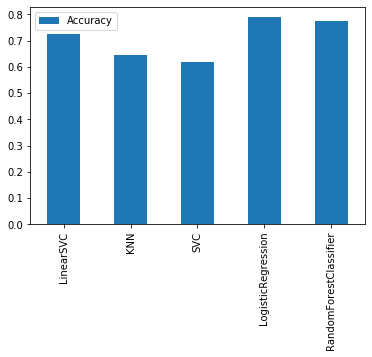

In [ ]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["Accuracy"])
results_df.plot.bar();

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [ ]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7894736842105263

In [ ]:
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)
clf.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import confusion_matrix, classification_re
from sklearn.metrics import precision_score, recall_score, f1_scoreImport plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_preds)

array([[24, 11],
       [ 5, 36]])

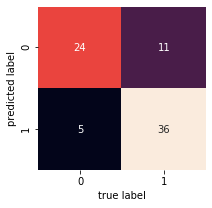

In [ ]:
import seaborn as sns
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



In [ ]:
precision_score(y_test, y_preds)

0.7659574468085106

In [ ]:
recall_score(y_test, y_preds)

0.8780487804878049

In [ ]:
f1_score(y_test, y_preds)

0.8181818181818182

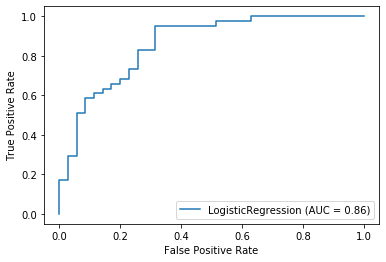

In [ ]:
plot_roc_curve(clf, X_test, y_test);

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf,
                X,
                y,
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In [ ]:
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8215873015873015

In [ ]:
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

0.9272727272727274

In [ ]:
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.8705403543192143

In [ ]:
from joblib import dump, load

In [ ]:
dump(clf, "trained-classifier.joblib")

['trained-classifier.joblib']

In [ ]:
loaded_clf = load("trained-classifier.joblib")
loaded_clf.score(X_test, y_test)

0.7894736842105263

In [ ]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Make             951 non-null object
Colour           950 non-null object
Odometer (KM)    950 non-null float64
Doors            950 non-null float64
Price            950 non-null float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

In [ ]:
car_sales.dropna(subset=["Price"], inplace=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
door_feature = ["Doors"]

ne
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [ ]:
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
   ("imputer", SimpleImputer(strategy="median"))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

In [ ]:
from sklearn.linear_model import Ridge

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

In [ ]:
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}
regression_results = {}

In [ ]:
car_sales_X = car_sales.drop("Price", axis=1)

car_sales_y = car_sales["Price"]

In [ ]:
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

In [ ]:
for model_name, model in regression_models.items():

    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])


    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test,
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [ ]:
regression_results

{'Ridge': 0.25402611057943925,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.2291358152962253}

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [ ]:
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])
ridge_pipeline.fit(car_X_train, car_y_train)

car_y_preds = ridge_pipeline.predict(car_X_test)
car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [ ]:
mse = mean_squared_error(car_y_test, car_y_preds)
mse

49950182.633374564

In [ ]:
mae =  mean_absolute_error(car_y_test, car_y_preds)
mae

5713.8215208551555

In [ ]:
r2 = r2_score(car_y_test, car_y_preds)
r2

0.25402611057943925